In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
df = pd.read_csv('../preprocess_data.csv')
df.drop(['task_1','Unnamed: 0','text'], axis=1, inplace=True)
df.head()

,Unnamed: 0.1,_id,task_2,text_clean
0,4986,60c5d6bf5659ea5e55defa2c,PRFN,if you made it through this ampamp were not on...
1,3394,60c5d6bf5659ea5e55def461,OFFN,technically thats still turning back the clock...
2,1310,60c5d6bf5659ea5e55defaad,NONE,and youre the govt stop thinking about world m...
3,3390,60c5d6bf5659ea5e55def419,OFFN,soldier of japan who has dick head
4,4626,60c5d6bf5659ea5e55def7fa,OFFN,youd be better off asking who doesnt think hes...


Text(0, 0.5, 'Frequency')

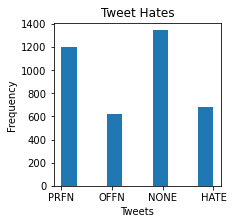

In [33]:
fig, ax = plt.subplots(figsize=(3,3))

ax.hist(df['task_2'])

ax.set_title('Tweet Hates')
ax.set_xlabel('Tweets')
ax.set_ylabel('Frequency')

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5)
X = tfidfconverter.fit_transform(df['text_clean'].values.astype('U')).toarray()
y = df['task_2']

In [35]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [17]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 38  20  35   3]
 [ 50  67  41  39]
 [ 24  18  36  26]
 [  8  23  26 123]]


0.45753899480069327

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 37  40  15   4]
 [ 24 145   5  23]
 [ 20  27  29  28]
 [  2  18   3 157]]


0.6377816291161178

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 18, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 26  57   5   8]
 [ 13 150   3  31]
 [ 22  43   5  34]
 [  1  30   4 145]]


0.5649913344887348

In [22]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 44  29  20   3]
 [ 26 141   5  25]
 [ 22  23  30  29]
 [  1  14   3 162]]


0.6533795493934142

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 44  29  20   3]
 [ 26 141   5  25]
 [ 22  23  30  29]
 [  1  14   3 162]]


0.6533795493934142

In [38]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 48)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 35  39  17   5]
 [ 35 107  21  34]
 [ 24  23  31  26]
 [ 12  29  18 121]]


0.5095320623916811

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 33  42  16   5]
 [ 27 144   8  18]
 [ 25  34  15  30]
 [  4  35   5 136]]


0.5684575389948007

In [42]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      sv.fit(x_train,y_train)
      predictions = sv.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

0.5818181818181818
0.5974025974025974
0.6077922077922078
0.609375
0.6588541666666666
0.6770833333333334


In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      rf.fit(x_train,y_train)
      predictions = rf.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

0.6441558441558441
0.6588541666666666
0.6692708333333334
